# Create Monthly CESM ice flux files

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import datetime as dt

%matplotlib inline

In [3]:
imin, imax = 1480, 2050
jmin, jmax = 160, 800

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:])

mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12-EXH006_5d_gridT_y2002m01d05.nc')
lons  = np.array(mesh.variables['nav_lon'])
lats  = np.array(mesh.variables['nav_lat'])
tmask = tmask[0,:,imin:imax,jmin:jmax]

Load data for year 2015:

In [5]:
ice = np.empty((12, 2400, 1632))
folder='/ocean/brogalla/GEOTRACES/data/'

for i in range(1,13):
    if i < 10:
        file='ice_flux_y2015m0'+str(i)+'.nc'
    else:
        file='ice_flux_y2015m'+str(i)+'.nc'
    ice_flux  = nc.Dataset(folder+file)
    dust_flux = np.array(ice_flux.variables['dust'])
    
    ice[i-1,:,:] = dust_flux 

Plus ice concentration in LIM2:

In [6]:
filei1  = 'ANHA12-EXH006_5d_icemod_y2015m01d05.nc'
filei2  = 'ANHA12-EXH006_5d_icemod_y2015m02d04.nc'
filei3  = 'ANHA12-EXH006_5d_icemod_y2015m03d01.nc'
filei4  = 'ANHA12-EXH006_5d_icemod_y2015m04d05.nc'
filei5  = 'ANHA12-EXH006_5d_icemod_y2015m05d05.nc'
filei6  = 'ANHA12-EXH006_5d_icemod_y2015m06d04.nc'
filei7  = 'ANHA12-EXH006_5d_icemod_y2015m07d04.nc'
filei8  = 'ANHA12-EXH006_5d_icemod_y2015m08d03.nc'
filei9  = 'ANHA12-EXH006_5d_icemod_y2015m09d02.nc'
filei10 = 'ANHA12-EXH006_5d_icemod_y2015m10d02.nc'
filei11 = 'ANHA12-EXH006_5d_icemod_y2015m11d01.nc'
filei12 = 'ANHA12-EXH006_5d_icemod_y2015m12d01.nc'

In [7]:
def load_variables(filename):
    folder  = '/data/brogalla/ANHA12/'
    a = nc.Dataset(folder+filename)
    
    # shape: (1, 2400, 1632)
    ice_conc = np.array(a.variables['iiceprod'][0])      # ice production [m/kt]
    
    return ice_conc

In [8]:
ice_conc = np.empty((12, 2400, 1632))

filei=[filei1, filei2, filei3, filei4, filei5, filei6, \
       filei7, filei8, filei9, filei10, filei11, filei12]

for i in range(0,12):
    ice_conc[i,:,:] = load_variables(filei[i])

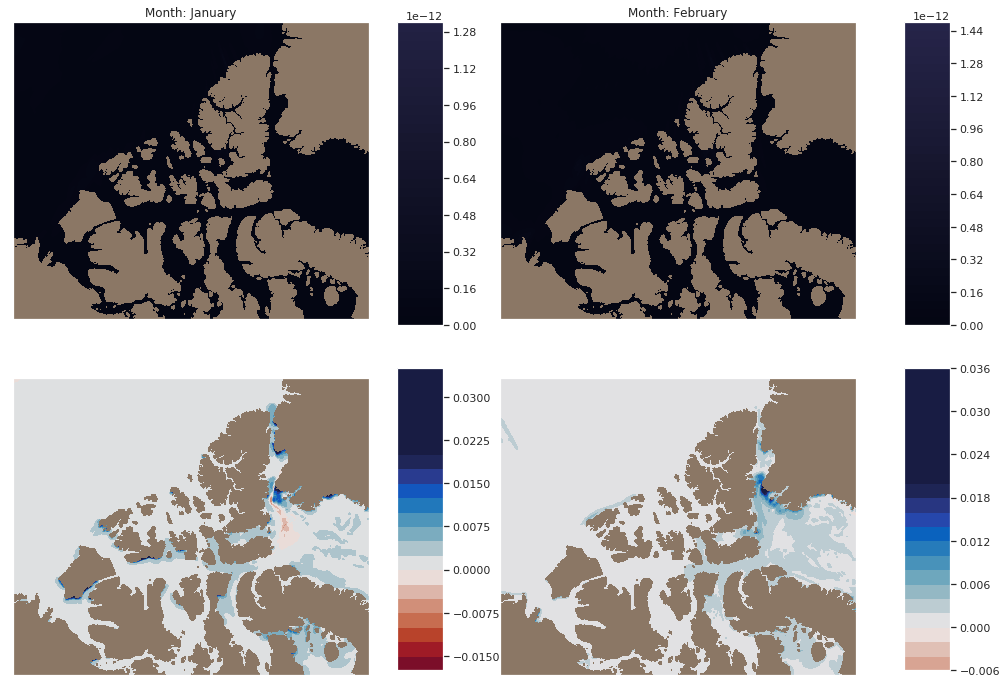

In [124]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

proj1 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,0])
proj2 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,1])
proj3 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,0])
proj4 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,1])

x_land, y_land = proj2(lons, lats)
proj1.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj3.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj4.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

CS1 = proj1.contourf(x_land, y_land, ice[0,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS2 = proj2.contourf(x_land, y_land, ice[1,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS3 = proj3.contourf(x_land, y_land, ice_conc[0,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)
CS4 = proj4.contourf(x_land, y_land, ice_conc[1,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)

ax[0,0].set_title('Month: January')
ax[0,1].set_title('Month: February')

cbaxes1 = fig.add_axes([0.48, 0.53, 0.04, 0.35]) 
cbaxes2 = fig.add_axes([0.92, 0.53, 0.04, 0.35]) 
cbaxes3 = fig.add_axes([0.48, 0.13, 0.04, 0.35]) 
cbaxes4 = fig.add_axes([0.92, 0.13, 0.04, 0.35]) 
CB1 = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)
CB2 = plt.colorbar(CS2, ax=ax[0,1], cax=cbaxes2)
CB3 = plt.colorbar(CS3, ax=ax[1,0], cax=cbaxes3)
CB4 = plt.colorbar(CS4, ax=ax[1,1], cax=cbaxes4)

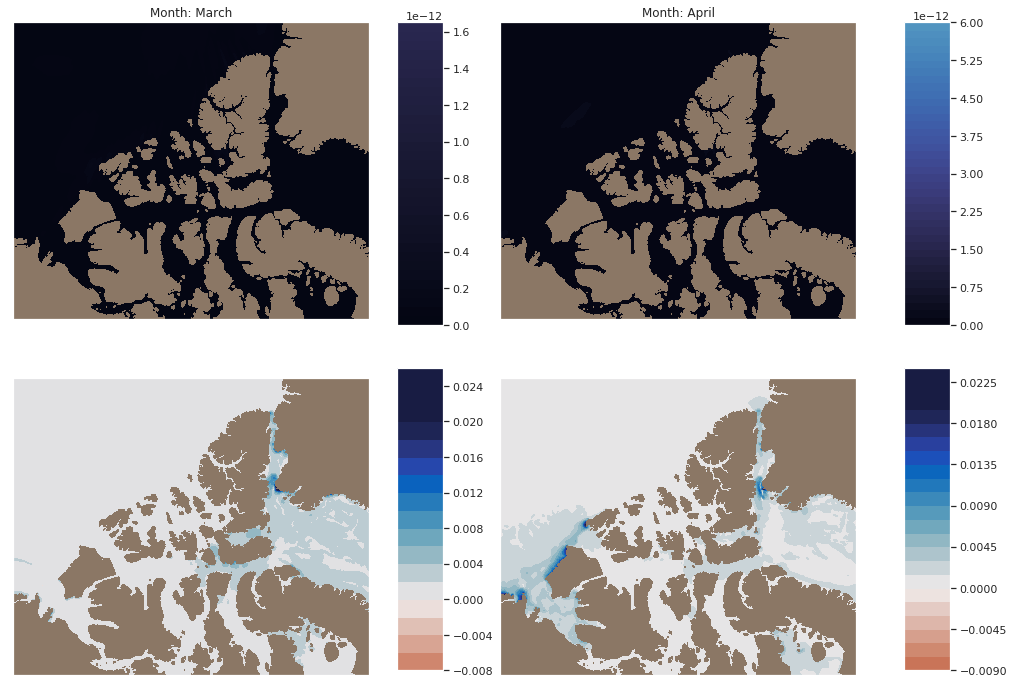

In [125]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

proj1 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,0])
proj2 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,1])
proj3 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,0])
proj4 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,1])

x_land, y_land = proj2(lons, lats)
proj1.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj3.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj4.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

CS1 = proj1.contourf(x_land, y_land, ice[2,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS2 = proj2.contourf(x_land, y_land, ice[3,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS3 = proj3.contourf(x_land, y_land, ice_conc[2,:,:]*100, vmin=-0.02, vmax=0.02, levels=2[0,1]0, cmap=cmocean.cm.balance_r)
CS4 = proj4.contourf(x_land, y_land, ice_conc[3,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)

ax[0,0].set_title('Month: March')
ax[0,1].set_title('Month: April')

cbaxes1 = fig.add_axes([0.48, 0.53, 0.04, 0.35]) 
cbaxes2 = fig.add_axes([0.92, 0.53, 0.04, 0.35]) 
cbaxes3 = fig.add_axes([0.48, 0.13, 0.04, 0.35]) 
cbaxes4 = fig.add_axes([0.92, 0.13, 0.04, 0.35]) 
CB1 = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)
CB2 = plt.colorbar(CS2, ax=ax[0,1], cax=cbaxes2)
CB3 = plt.colorbar(CS3, ax=ax[1,0], cax=cbaxes3)
CB4 = plt.colorbar(CS4, ax=ax[1,1], cax=cbaxes4)

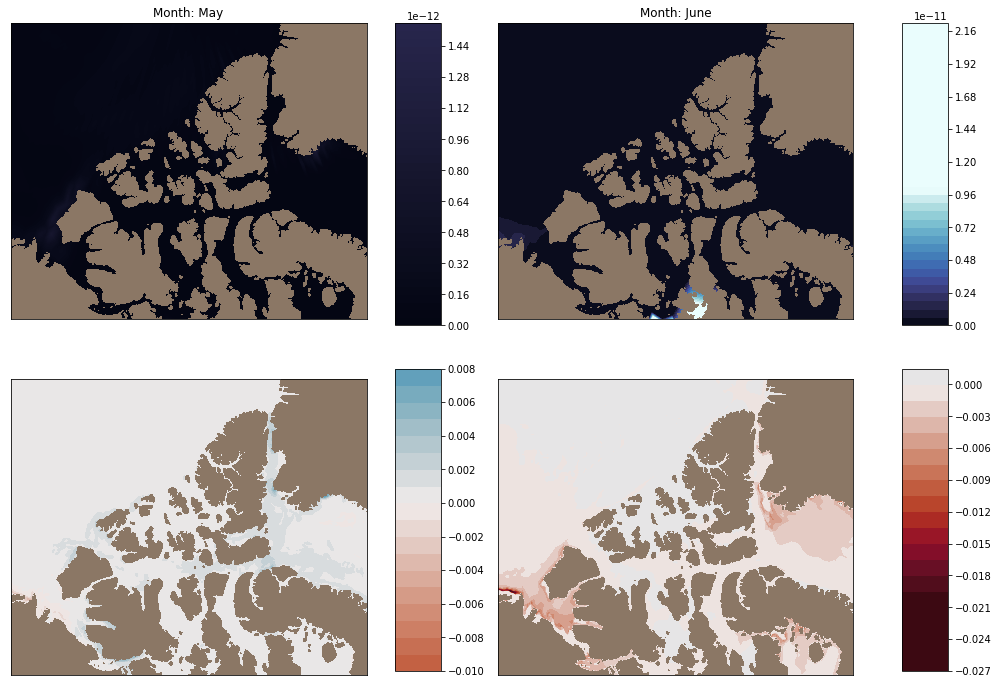

In [9]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

proj1 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,0])
proj2 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,1])
proj3 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,0])
proj4 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,1])

x_land, y_land = proj2(lons, lats)
proj1.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj3.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj4.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

CS1 = proj1.contourf(x_land, y_land, ice[4,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS2 = proj2.contourf(x_land, y_land, ice[5,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS3 = proj3.contourf(x_land, y_land, ice_conc[4,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)
CS4 = proj4.contourf(x_land, y_land, ice_conc[5,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)

ax[0,0].set_title('Month: May')
ax[0,1].set_title('Month: June')

cbaxes1 = fig.add_axes([0.48, 0.53, 0.04, 0.35]) 
cbaxes2 = fig.add_axes([0.92, 0.53, 0.04, 0.35]) 
cbaxes3 = fig.add_axes([0.48, 0.13, 0.04, 0.35]) 
cbaxes4 = fig.add_axes([0.92, 0.13, 0.04, 0.35]) 
CB1 = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)
CB2 = plt.colorbar(CS2, ax=ax[0,1], cax=cbaxes2)
CB3 = plt.colorbar(CS3, ax=ax[1,0], cax=cbaxes3)
CB4 = plt.colorbar(CS4, ax=ax[1,1], cax=cbaxes4)

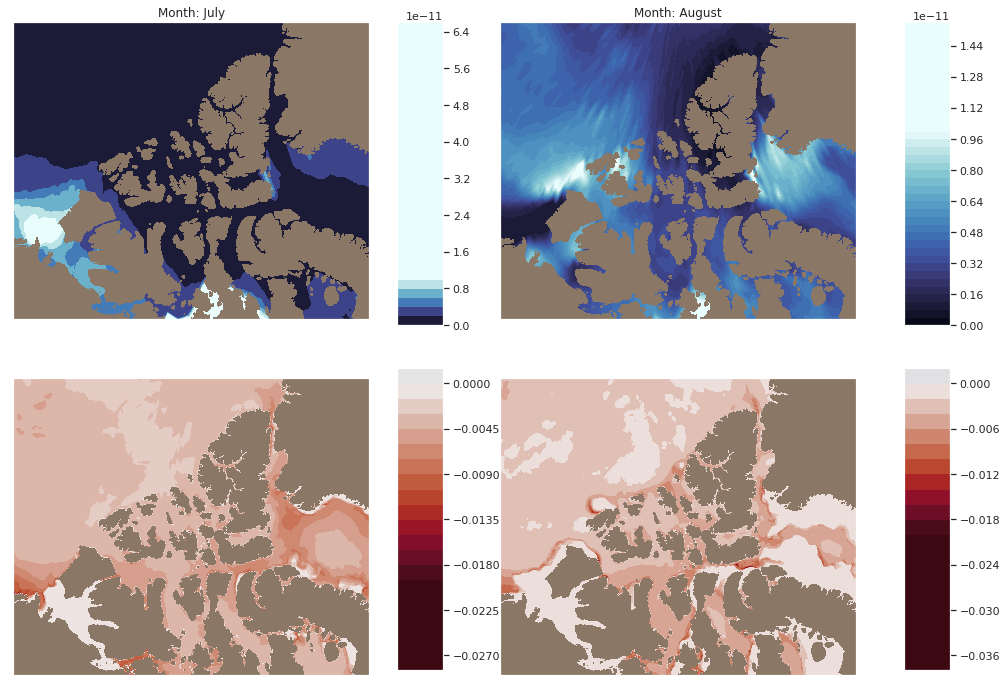

In [127]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

proj1 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,0])
proj2 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,1])
proj3 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,0])
proj4 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,1])

x_land, y_land = proj2(lons, lats)
proj1.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj3.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj4.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

CS1 = proj1.contourf(x_land, y_land, ice[6,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS2 = proj2.contourf(x_land, y_land, ice[7,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS3 = proj3.contourf(x_land, y_land, ice_conc[6,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)
CS4 = proj4.contourf(x_land, y_land, ice_conc[7,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)

ax[0,0].set_title('Month: July')
ax[0,1].set_title('Month: August')

cbaxes1 = fig.add_axes([0.48, 0.53, 0.04, 0.35]) 
cbaxes2 = fig.add_axes([0.92, 0.53, 0.04, 0.35]) 
cbaxes3 = fig.add_axes([0.48, 0.13, 0.04, 0.35]) 
cbaxes4 = fig.add_axes([0.92, 0.13, 0.04, 0.35]) 
CB1 = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)
CB2 = plt.colorbar(CS2, ax=ax[0,1], cax=cbaxes2)
CB3 = plt.colorbar(CS3, ax=ax[1,0], cax=cbaxes3)
CB4 = plt.colorbar(CS4, ax=ax[1,1], cax=cbaxes4)

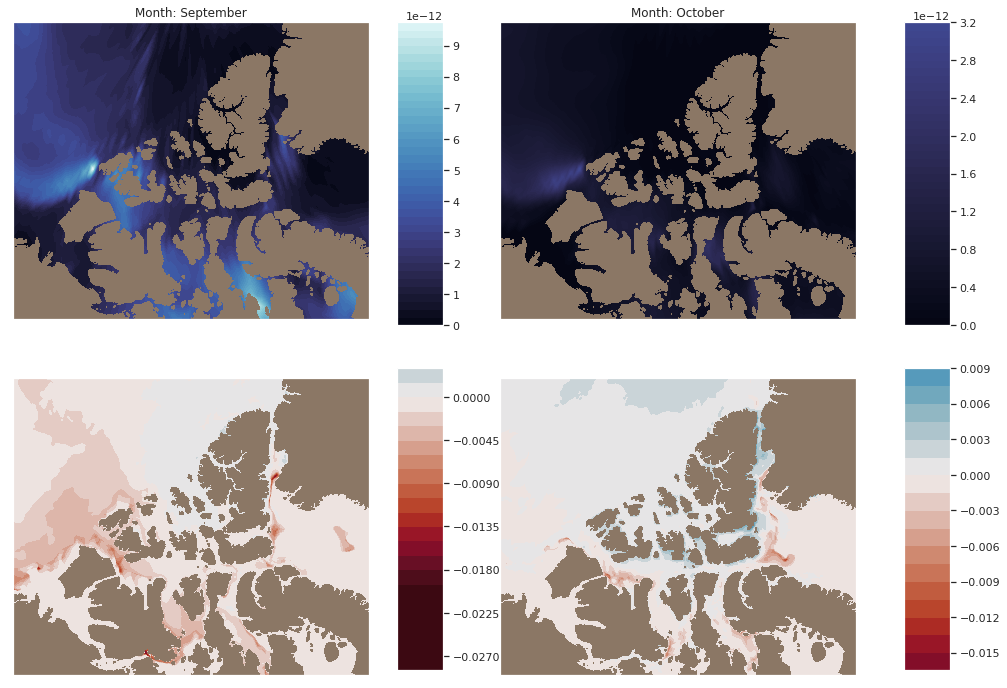

In [129]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

proj1 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,0])
proj2 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,1])
proj3 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,0])
proj4 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,1])

x_land, y_land = proj2(lons, lats)
proj1.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj3.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj4.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

CS1 = proj1.contourf(x_land, y_land, ice[8,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS2 = proj2.contourf(x_land, y_land, ice[9,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS3 = proj3.contourf(x_land, y_land, ice_conc[8,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)
CS4 = proj4.contourf(x_land, y_land, ice_conc[9,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)

ax[0,0].set_title('Month: September')
ax[0,1].set_title('Month: October')

cbaxes1 = fig.add_axes([0.48, 0.53, 0.04, 0.35]) 
cbaxes2 = fig.add_axes([0.92, 0.53, 0.04, 0.35]) 
cbaxes3 = fig.add_axes([0.48, 0.13, 0.04, 0.35]) 
cbaxes4 = fig.add_axes([0.92, 0.13, 0.04, 0.35]) 
CB1 = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)
CB2 = plt.colorbar(CS2, ax=ax[0,1], cax=cbaxes2)
CB3 = plt.colorbar(CS3, ax=ax[1,0], cax=cbaxes3)
CB4 = plt.colorbar(CS4, ax=ax[1,1], cax=cbaxes4)

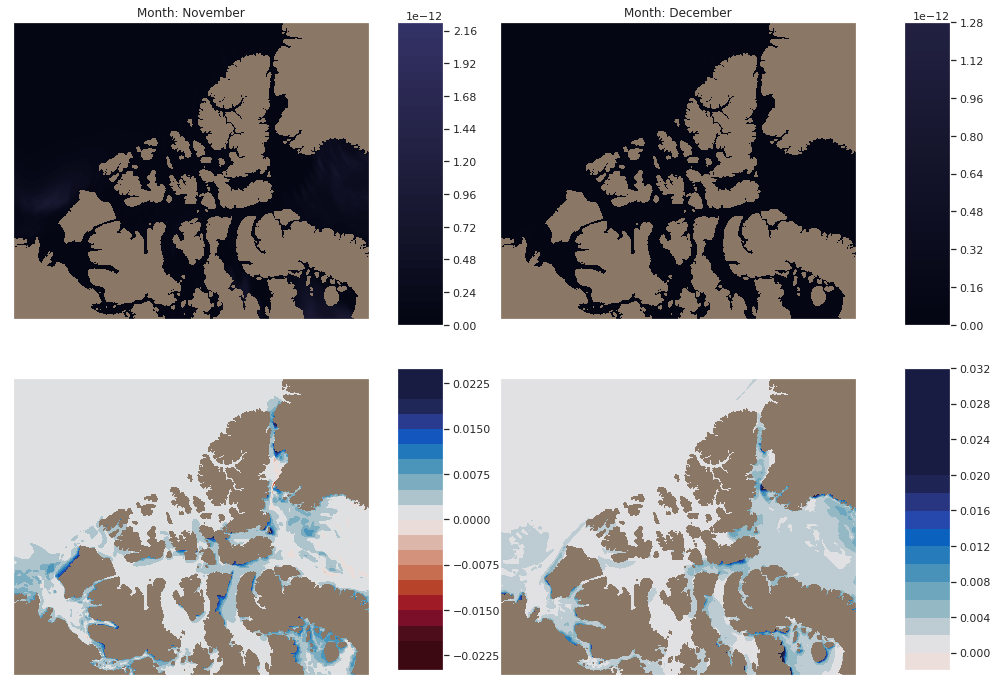

In [128]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

proj1 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,0])
proj2 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[0,1])
proj3 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,0])
proj4 = Basemap(projection='stere',lat_0 = 77, lon_0 = -99, resolution='i', width=2.4e6, height=2.0e6, ax=ax[1,1])

x_land, y_land = proj2(lons, lats)
proj1.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj3.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
proj4.contourf(x_land[:,:], y_land[:,:], land_mask[0,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

CS1 = proj1.contourf(x_land, y_land, ice[10,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS2 = proj2.contourf(x_land, y_land, ice[11,:,:], vmin=0, vmax=1e-11, levels=40, cmap=cmocean.cm.ice)
CS3 = proj3.contourf(x_land, y_land, ice_conc[10,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)
CS4 = proj4.contourf(x_land, y_land, ice_conc[11,:,:]*100, vmin=-0.02, vmax=0.02, levels=20, cmap=cmocean.cm.balance_r)

ax[0,0].set_title('Month: November')
ax[0,1].set_title('Month: December')

cbaxes1 = fig.add_axes([0.48, 0.53, 0.04, 0.35]) 
cbaxes2 = fig.add_axes([0.92, 0.53, 0.04, 0.35]) 
cbaxes3 = fig.add_axes([0.48, 0.13, 0.04, 0.35]) 
cbaxes4 = fig.add_axes([0.92, 0.13, 0.04, 0.35]) 
CB1 = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)
CB2 = plt.colorbar(CS2, ax=ax[0,1], cax=cbaxes2)
CB3 = plt.colorbar(CS3, ax=ax[1,0], cax=cbaxes3)
CB4 = plt.colorbar(CS4, ax=ax[1,1], cax=cbaxes4)

Maximum rate: 

In [28]:
print(np.average(ice[6,imin:imax, jmin:jmax]), np.average(ice[7,imin:imax,jmin:jmax]))
print(np.average(np.sum(ice[:,imin:imax, jmin:jmax], axis=0)/12))
print(np.nanmax(ice[6,imin:imax, jmin:jmax]), np.nanmax(ice[7,imin:imax,jmin:jmax]))

7.009717135867104e-12 4.589190932546352e-12
1.3517659568348315e-12
1.6556085243954193e-10 3.0147046984894644e-11


In [24]:
print('Ave in a year contribution in nM:', 0.65*(1/54.94)*0.170*1.35e-12*3600*24*30*365*1e9)

Ave in a year contribution in nM: 2568.8293410993815


In [20]:
print('Ave July contribution in nM:', 0.65*(1/54.94)*0.170*7e-12*3600*24*30*1e9)

July contribution in nM: 36.492755733527495


In [22]:
print('Ave August contribution in nM:', 0.65*(1/54.94)*0.170*4.59e-12*3600*24*30*1e9)

Ave August contribution in nM: 23.928821259555885


In [ ]:
0.65*(1/54.94)*0.170*1e-11*3600*24*30

Taking into account the turbocline depth:

In [42]:
a     = nc.Dataset('/data/brogalla/ANHA12/ANHA12-EXH006_5d_gridT_y2002m08d23.nc')
turbo = np.array(a.variables['sohmld']) # turbocline depth in meters

In [40]:
turbo_m = np.ma.masked_where(tmask[0,:,:] < 0.1, turbo[0,imin:imax,jmin:jmax])

In [41]:
print(np.ma.amin(turbo_m))
print(np.ma.amax(turbo_m))

10.0
38.80514


Contribution from sea-ice component: 

$\frac{dMn}{dt} = \frac{\alpha}{e3t0} \cdot \frac{f_{mn,ice}}{m} \cdot \Phi$

$\frac{dMn}{dt} = \frac{0.65}{1.0} \cdot \frac{0.170}{54.94} \cdot \Phi = 0.002 \cdot \Phi$

$\frac{dMn}{dt} = 0.002\cdot365\cdot24\cdot3600 \cdot \Phi$

$\frac{dMn}{dt} = 0.002\cdot365\cdot24\cdot3600 \cdot \frac{\Phi}{sohmld}$

In [55]:
constants = 0.65*(1/54.94)*0.170*3600*24*365*1e9
div = np.divide(ice[:,imin:imax, jmin:jmax], turbo[0,imin:imax, jmin:jmax])

print('Max contribution from sea ice     [nM]: ', constants*np.nanmax(div[div != np.inf]))
print('Average contribution from sea ice [nM]: ', constants*np.nanmean(div[div != np.inf]))
print('Min contribution from sea ice     [nM]: ', constants*np.nanmin(div[div != np.inf]))

Max contribution from sea ice     [nM]:  493.9804511067321
Average contribution from sea ice [nM]:  2.571489230199169
Min contribution from sea ice     [nM]:  0.0


/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(based on turbocline depth in January, monthly ice flux values)